In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime, timedelta

import os
os.environ["OMP_NUM_THREADS"] = "4"

In [24]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [25]:
# experiment 2 results

path1 = r'E:\results\overall_results.csv'
path2 = r'E:\results\fb_results_max_days_0_max_items_1_.csv'
path3 = r'E:\results\fb_results_max_days_0_max_items_2_.csv'
path4 = r'E:\results\fb_results_max_days_1_max_items_1_.csv'
path5 = r'E:\results\fb_results_max_days_1_max_items_2_.csv'
path6 = r'E:\results\fb_results_max_days_2_max_items_1_.csv'
path7 = r'E:\results\fb_results_max_days_2_max_items_2_.csv'

In [26]:
df1 = pd.read_csv(path1)
df2 = pd.read_csv(path2)
df3 = pd.read_csv(path3)
df4 = pd.read_csv(path4)
df5 = pd.read_csv(path5)
df6 = pd.read_csv(path6)
df7 = pd.read_csv(path7)

In [27]:
# changing markov to mc
df1.loc[df1['model_name'] == 'markov', 'model_name'] = 'mc'
df2.loc[df2['model_name'] == 'markov', 'model_name'] = 'mc'
df3.loc[df3['model_name'] == 'markov', 'model_name'] = 'mc'
df4.loc[df4['model_name'] == 'markov', 'model_name'] = 'mc'
df5.loc[df5['model_name'] == 'markov', 'model_name'] = 'mc'
df6.loc[df6['model_name'] == 'markov', 'model_name'] = 'mc'
df7.loc[df7['model_name'] == 'markov', 'model_name'] = 'mc'


In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3060 entries, 0 to 3059
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   experiment     3060 non-null   object 
 1   dataset_name   3060 non-null   object 
 2   model_name     3060 non-null   object 
 3   split_type     3060 non-null   object 
 4   pred_length    3060 non-null   int64  
 5   avg_precision  3060 non-null   float64
 6   avg_recall     3060 non-null   float64
 7   avg_f1_score   3060 non-null   float64
 8   avg_f05_score  3060 non-null   float64
 9   avg_f2_score   3060 non-null   float64
 10  avg_hit_score  3060 non-null   float64
dtypes: float64(6), int64(1), object(4)
memory usage: 263.1+ KB


In [29]:
null_rows = df1[df1['split_type'].isna()]

null_rows

,experiment,dataset_name,model_name,split_type,pred_length,avg_precision,avg_recall,avg_f1_score,avg_f05_score,avg_f2_score,avg_hit_score


In [30]:
last_rows = df1[df1['model_name']== 'last']

last_rows

,experiment,dataset_name,model_name,split_type,pred_length,avg_precision,avg_recall,avg_f1_score,avg_f05_score,avg_f2_score,avg_hit_score
380,1vR,coop,last,fixed,2,0.221325,0.213394,0.189537,0.237744,0.117000,0.654959
381,1vR,tafeng,last,fixed,2,0.096885,0.043275,0.052525,0.080740,0.027429,0.161708
382,1vR,coop,last,90,2,0.193705,0.191841,0.168210,0.209986,0.104394,0.650278
383,1vR,tafeng,last,90,2,0.099143,0.048048,0.055824,0.084353,0.029816,0.161993
384,1vR,coop,last,80,2,0.189002,0.186155,0.163200,0.204153,0.101202,0.641796
385,1vR,tafeng,last,80,2,0.099313,0.045399,0.053818,0.082310,0.028419,0.157276
386,1vR,coop,last,70,2,0.185832,0.184366,0.160642,0.200759,0.099872,0.644036
387,1vR,tafeng,last,70,2,0.095953,0.043678,0.051676,0.079018,0.027312,0.154479
388,1vR,coop,last,60,2,0.185408,0.180548,0.158520,0.199059,0.098172,0.640916
389,1vR,tafeng,last,60,2,0.094482,0.040950,0.049483,0.076670,0.025847,0.145904


### Fixing Last

In [31]:
# Store the dataframes in a list
dfs = [df1, df2, df3, df4, df5, df6, df7]

# Iterate over each dataframe in the list using enumerate
for idx, df in enumerate(dfs):
    # Create the last_rows DataFrame for the current dataframe
    last_rows = df[df['model_name'] == 'last']
    
    # List to store the original dataframe and the new rows
    df_list = [df]
    
    # Loop through pred_length values from 3 to 20
    for pred in range(3, 21):
        # Create a copy of last_rows
        new_rows = last_rows.copy()
        
        # Set the pred_length for the new rows
        new_rows['pred_length'] = pred
        
        # Append the new rows to the list
        df_list.append(new_rows)
    
    # Concatenate all the dataframes in the list
    dfs[idx] = pd.concat(df_list, ignore_index=True)

# Now, assign back the modified dataframes to their respective variable names
df1, df2, df3, df4, df5, df6, df7 = dfs


### Overall results

In [32]:
df1 = df1.sort_values(by=['model_name', 'pred_length', 'split_type']).reset_index(drop=True)
df2 = df2.sort_values(by=['model_name', 'pred_length', 'split_type']).reset_index(drop=True)
df3 = df3.sort_values(by=['model_name', 'pred_length', 'split_type']).reset_index(drop=True)
df4 = df4.sort_values(by=['model_name', 'pred_length', 'split_type']).reset_index(drop=True)
df5 = df5.sort_values(by=['model_name', 'pred_length', 'split_type']).reset_index(drop=True)
df6 = df6.sort_values(by=['model_name', 'pred_length', 'split_type']).reset_index(drop=True)
df7 = df7.sort_values(by=['model_name', 'pred_length', 'split_type']).reset_index(drop=True)
df1.head()

,experiment,dataset_name,model_name,split_type,pred_length,avg_precision,avg_recall,avg_f1_score,avg_f05_score,avg_f2_score,avg_hit_score
0,1vR,coop,clf,10,2,0.284475,0.076378,0.108343,0.193096,0.051264,0.463695
1,1vR,tafeng,clf,10,2,0.109312,0.044574,0.056238,0.088316,0.028791,0.143280
2,1vR,coop,clf,20,2,0.285663,0.077078,0.109143,0.194287,0.051695,0.465486
3,1vR,tafeng,clf,20,2,0.115210,0.045955,0.057029,0.090423,0.029344,0.161976
4,1vR,coop,clf,30,2,0.289004,0.077922,0.110268,0.196373,0.052238,0.470708


#### plots

In [33]:
df1 = df1[df1['dataset_name'] == 'coop']
df2 = df2[df2['dataset_name'] == 'coop']
df3 = df3[df3['dataset_name'] == 'coop']
df4 = df4[df4['dataset_name'] == 'coop']
df5 = df5[df5['dataset_name'] == 'coop']
df6 = df6[df6['dataset_name'] == 'coop']
df7 = df7[df7['dataset_name'] == 'coop']

In [34]:
def plot_model_performance(df, metrics=None, selected_splits=None, selected_pred_lengths=None, figsize=None, custom_colors=None, custom_markers=None):
    """
    Create a grid of plots showing model performance metrics across different split types.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing the data with columns:
        ['dataset_name', 'split_type', 'model_name', 'pred_length', 'avg_f1_score', 'avg_recall', 'avg_hit_score']
    metrics : list, optional
        List of metrics to plot. Each metric should be a tuple of (column_name, display_title).
        Defaults to [('avg_f1_score', 'F1 Score'), ('avg_recall', 'Recall'), ('avg_hit_score', 'Hit Score')]
    selected_splits : list, optional
        List of split types to include. Defaults to ['10', '50', '90']
    selected_pred_lengths : list, optional
        List of prediction lengths to include. Defaults to None (all lengths)
    figsize : tuple, optional
        Figure size as (width, height). Defaults to None, which calculates based on number of splits
    custom_colors : dict, optional
        Dictionary mapping model names to colors
    custom_markers : dict, optional
        Dictionary mapping model names to marker styles
    
    Returns:
    --------
    fig : matplotlib.figure.Figure
        The created figure object
    axes : numpy.ndarray
        Array of subplot axes
    """
    import matplotlib.pyplot as plt
    import numpy as np
    
    # Default metrics if none provided
    if metrics is None:
        metrics = [
            ('avg_f1_score', 'F1 Score'),
            ('avg_recall', 'Recall'),
            ('avg_hit_score', 'Hit Score')
        ]
    
    # Default model styling
    default_colors = {
        'top': '#1f77b4',     # blue
        'last': '#ff7f0e',    # orange
        'mc': '#2ca02c',  # green
        'ibp': '#d62728',     # red
        'nmf': '#9467bd',     # purple
        'fpmc': '#8c564b',    # brown
        'clf': '#e377c2',     # pink
        'hrm': '#7f7f7f',     # gray
        'tbp': '#bcbd22',     # yellow-green
        'xmt': '#17becf',     # cyan
        'txmt': '#000000'     # black
    }

    default_markers = {
        'top': 'o',           # circle
        'last': 's',         # square
        'mc': '^',       # triangle up
        'ibp': 'v',          # triangle down
        'nmf': 'D',          # diamond
        'fpmc': 'p',         # pentagon
        'clf': 'h',          # hexagon
        'hrm': '*',          # star
        'tbp': 'X',          # x filled
        'xmt': 'P',          # plus filled
        'txmt': '8'          # octagon
    }
    
    # Use provided styling or defaults
    model_colors = custom_colors if custom_colors is not None else default_colors
    markers = custom_markers if custom_markers is not None else default_markers
    
    # Reset to default style
    plt.style.use('default')
    
    # Filter for specific split types and prediction lengths
    selected_splits = selected_splits if selected_splits is not None else ['10', '50', '90']
    df_filtered = df[df['split_type'].isin(selected_splits)]
    
    if selected_pred_lengths is not None:
        df_filtered = df_filtered[df_filtered['pred_length'].isin(selected_pred_lengths)]
    
    split_types = np.sort(df_filtered['split_type'].unique())
    datasets = df_filtered['dataset_name'].unique()
    models = df_filtered['model_name'].unique()
    
    # Create figure
    n_cols = len(split_types)
    n_rows = len(metrics)
    if figsize is None:
        figsize = (5 * n_cols, 3 * n_rows)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize, sharex=False)
    
    # Handle case where there's only one column or row
    if n_cols == 1:
        axes = axes.reshape(-1, 1)
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    
    # Create a single legend handle list
    legend_handles = []
    legend_labels = []
    
    # Loop through metrics and split types
    for i, (metric_col, metric_title) in enumerate(metrics):
        for j, split_type in enumerate(split_types):
            ax = axes[i, j]
            
            # Filter data for current split type
            split_df = df_filtered[df_filtered['split_type'] == split_type]
            
            # Store all lines for z-ordering
            lines_data = []
            
            # Collect data for all models
            for dataset in datasets:
                dataset_split_df = split_df[split_df['dataset_name'] == dataset]
                
                if dataset_split_df.empty:
                    continue
                
                for model in models:
                    model_df = dataset_split_df[dataset_split_df['model_name'] == model]
                    if not model_df.empty:
                        lines_data.append({
                            'x': model_df['pred_length'],
                            'y': model_df[metric_col],
                            'model': model,
                            'max_value': model_df[metric_col].max()
                        })
            
            # Sort by maximum value for z-ordering (highest on top)
            lines_data.sort(key=lambda x: x['max_value'])
            
            # Plot lines in order
            for line_data in lines_data:
                line = ax.plot(line_data['x'], line_data['y'],
                             color=model_colors[line_data['model']],
                             marker=markers[line_data['model']],
                             label=line_data['model'],
                             markersize=8)
                
                # Only store legend handles from the last subplot in the last row
                if i == len(metrics)-1 and j == len(split_types)-1:
                    legend_handles.append(line[0])
                    legend_labels.append(line_data['model'])
            
            # Set specific tick marks
            unique_pred_lengths = sorted(split_df['pred_length'].unique())
            ax.set_xticks(unique_pred_lengths)
            ax.set_xticklabels(unique_pred_lengths)
            
            # Only show x-axis label for bottom row
            if i == len(metrics) - 1:
                ax.set_xlabel('Prediction Length')
            else:
                ax.set_xlabel('')
            
            # Only add split type title to top row
            if i == 0:
                ax.set_title(f'Split {split_type}')
            
            ax.grid(True, alpha=0.3)
            
            # Add ylabel only to first column
            if j == 0:
                ax.set_ylabel(metric_title)
    
    # Create a single legend on the right side of the figure
    fig.legend(legend_handles, legend_labels,
              title='Models',
              bbox_to_anchor=(1.0, 0.5),
              loc='center left',
              borderaxespad=0)
    
    # Adjust layout to make room for the legend
    plt.subplots_adjust(right=0.85)
    plt.tight_layout()
    
    return fig, axes

metrics = [
    ('avg_f1_score', 'F1 Score'),
    ('avg_recall', 'Recall')
]

In [35]:
def plot_model_performance(df, metrics=None, selected_splits=None, selected_pred_lengths=None, 
                        figsize=None, custom_colors=None, custom_markers=None,
                        label_fontsize=12, title_fontsize=14, legend_fontsize=12, 
                        line_alpha=0.7, save_path='model_performance.png'):
    """
    Create a grid of plots showing model performance metrics across different split types.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing the data with columns:
        ['dataset_name', 'split_type', 'model_name', 'pred_length', 'avg_f1_score', 'avg_recall', 'avg_hit_score']
    metrics : list, optional
        List of metrics to plot. Each metric should be a tuple of (column_name, display_title).
        Defaults to [('avg_f1_score', 'F1 Score'), ('avg_recall', 'Recall'), ('avg_hit_score', 'Hit Score')]
    selected_splits : list, optional
        List of split types to include. Defaults to ['10', '50', '90']
    selected_pred_lengths : list, optional
        List of prediction lengths to include. Defaults to None (all lengths)
    figsize : tuple, optional
        Figure size as (width, height). Defaults to None, which calculates based on number of splits
    custom_colors : dict, optional
        Dictionary mapping model names to colors
    custom_markers : dict, optional
        Dictionary mapping model names to marker styles
    label_fontsize : int, optional
        Font size for axis labels and tick labels (default: 12)
    title_fontsize : int, optional
        Font size for subplot titles (default: 14)
    legend_fontsize : int, optional
        Font size for legend text (default: 12)
    line_alpha : float, optional
        Transparency level for lines and markers (0-1, default: 0.7)
    save_path : str, optional
        Path to save the figure (default: 'model_performance.png')
    
    Returns:
    --------
    fig : matplotlib.figure.Figure
        The created figure object
    axes : numpy.ndarray
        Array of subplot axes
    """
    import matplotlib.pyplot as plt
    import numpy as np
    
    # Default metrics if none provided
    if metrics is None:
        metrics = [
            ('avg_f1_score', 'F1 Score'),
            ('avg_recall', 'Recall'),
            ('avg_hit_score', 'Hit Score')
        ]
    
    # Default model styling
    default_colors = {
        'top': '#1f77b4',     # blue
        'last': '#ff7f0e',    # orange
        'mc': '#2ca02c',      # green
        'ibp': '#d62728',     # red
        'nmf': '#9467bd',     # purple
        'fpmc': '#8c564b',    # brown
        'clf': '#e377c2',     # pink
        'hrm': '#7f7f7f',     # gray
        'tbp': '#bcbd22',     # yellow-green
        'xmt': '#17becf',     # cyan
        'txmt': '#000000'     # black
    }

    default_markers = {
        'top': 'o',           # circle
        'last': 's',          # square
        'mc': '^',           # triangle up
        'ibp': 'v',          # triangle down
        'nmf': 'D',          # diamond
        'fpmc': 'p',         # pentagon
        'clf': 'h',          # hexagon
        'hrm': '*',          # star
        'tbp': 'X',          # x filled
        'xmt': 'P',          # plus filled
        'txmt': '8'          # octagon
    }
    
    # Use provided styling or defaults
    model_colors = custom_colors if custom_colors is not None else default_colors
    markers = custom_markers if custom_markers is not None else default_markers
    
    # Reset to default style
    plt.style.use('default')
    
    # Filter for specific split types and prediction lengths
    selected_splits = selected_splits if selected_splits is not None else ['10', '50', '90']
    df_filtered = df[df['split_type'].isin(selected_splits)]
    
    if selected_pred_lengths is not None:
        df_filtered = df_filtered[df_filtered['pred_length'].isin(selected_pred_lengths)]
    
    split_types = np.sort(df_filtered['split_type'].unique())
    datasets = df_filtered['dataset_name'].unique()
    models = df_filtered['model_name'].unique()
    
    # Create figure
    n_cols = len(split_types)
    n_rows = len(metrics)
    if figsize is None:
        figsize = (6 * n_cols, 4 * n_rows)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize, sharex=False)
    
    # Handle case where there's only one column or row
    if n_cols == 1:
        axes = axes.reshape(-1, 1)
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    
    # Create a single legend handle list
    legend_handles = []
    legend_labels = []
    
    # Loop through metrics and split types
    for i, (metric_col, metric_title) in enumerate(metrics):
        for j, split_type in enumerate(split_types):
            ax = axes[i, j]
            
            # Filter data for current split type
            split_df = df_filtered[df_filtered['split_type'] == split_type]
            
            # Store all lines for z-ordering
            lines_data = []
            
            # Collect data for all models
            for dataset in datasets:
                dataset_split_df = split_df[split_df['dataset_name'] == dataset]
                
                if dataset_split_df.empty:
                    continue
                
                for model in models:
                    model_df = dataset_split_df[dataset_split_df['model_name'] == model]
                    if not model_df.empty:
                        lines_data.append({
                            'x': model_df['pred_length'],
                            'y': model_df[metric_col],
                            'model': model,
                            'max_value': model_df[metric_col].max()
                        })
            
            # Sort by maximum value for z-ordering (highest on top)
            lines_data.sort(key=lambda x: x['max_value'])
            
            # Plot lines in order
            for line_data in lines_data:
                line = ax.plot(line_data['x'], line_data['y'],
                             color=model_colors[line_data['model']],
                             marker=markers[line_data['model']],
                             label=line_data['model'],
                             markersize=8,
                             alpha=line_alpha,
                             markerfacecolor='white')
                
                # Only store legend handles from the last subplot in the last row
                if i == len(metrics)-1 and j == len(split_types)-1:
                    legend_handles.append(line[0])
                    legend_labels.append(line_data['model'])
            
            # Set specific tick marks with adjusted font size
            unique_pred_lengths = sorted(split_df['pred_length'].unique())
            ax.set_xticks(unique_pred_lengths)
            ax.set_xticklabels(unique_pred_lengths, fontsize=label_fontsize)
            ax.tick_params(axis='y', labelsize=label_fontsize)
            
            # Only show x-axis label for bottom row
            if i == len(metrics) - 1:
                ax.set_xlabel('Prediction Length', fontsize=label_fontsize)
            else:
                ax.set_xlabel('')
            
            # Only add split type title to top row
            if i == 0:
                ax.set_title(f'Split {split_type}', fontsize=title_fontsize)
            
            ax.grid(True, alpha=0.3)
            
            # Add ylabel only to first column
            if j == 0:
                ax.set_ylabel(metric_title, fontsize=label_fontsize)
    
    # Create a single legend on the right side of the figure
    fig.legend(legend_handles, legend_labels,
              title='Models',
              bbox_to_anchor=(1.0, 0.5),
              loc='center left',
              borderaxespad=0,
              fontsize=legend_fontsize,
              title_fontsize=title_fontsize)
    
    # Adjust layout to make room for the legend
    plt.subplots_adjust(right=0.85)
    plt.tight_layout()
    
    # Save the figure with high DPI
    plt.savefig(save_path, dpi=900, bbox_inches='tight')
    
    return fig, axes

# Example usage:
metrics = [
    ('avg_f1_score', 'F1 Score'),
    ('avg_recall', 'Recall')
]

# You can call the function with the new parameters like this:
'''
fig, axes = plot_model_performance(
    df,
    metrics=metrics,
    label_fontsize=14,
    title_fontsize=16,
    legend_fontsize=12,
    line_alpha=0.7,
    save_path='model_performance_high_res.png'
)
'''

"\nfig, axes = plot_model_performance(\n    df,\n    metrics=metrics,\n    label_fontsize=14,\n    title_fontsize=16,\n    legend_fontsize=12,\n    line_alpha=0.7,\n    save_path='model_performance_high_res.png'\n)\n"

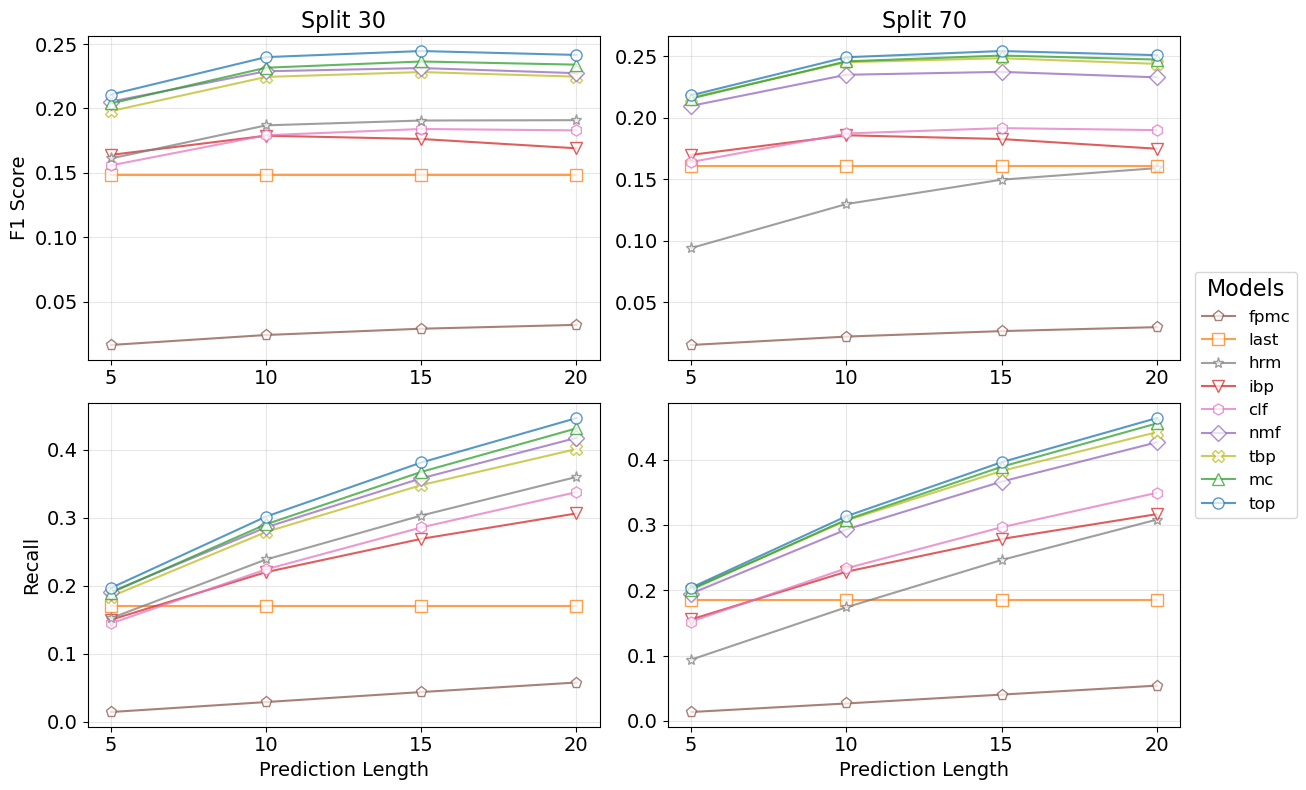

In [36]:
# Filter for specific prediction lengths
fig, axes = plot_model_performance(df1,
                                   metrics,
                                   selected_splits=['30', '70'],
                                   selected_pred_lengths=[5, 10, 15, 20],
                                   label_fontsize=14,
                                   title_fontsize=16,
                                   legend_fontsize=12,
                                   line_alpha=0.75,
                                   save_path='1fE_pred_length_full.png')

# Show the plot
plt.show()

### Forgotten, Max Days = 0,  Max Items = 1

In [37]:
df2.head()

,experiment,dataset_name,model_name,split_type,pred_length,avg_precision,avg_recall,avg_f1_score,avg_f05_score,avg_f2_score,avg_hit_score,max_days,max_items,large_basket_threshold
0,1vR,coop,clf,10,2,0.019582,0.039163,0.026109,0.026109,0.019582,0.039163,0,1,10
1,1vR,coop,clf,20,2,0.015532,0.031065,0.020710,0.020710,0.015532,0.031065,0,1,10
2,1vR,coop,clf,30,2,0.017254,0.034508,0.023006,0.023006,0.017254,0.034508,0,1,10
3,1vR,coop,clf,40,2,0.019792,0.039584,0.026390,0.026390,0.019792,0.039584,0,1,10
4,1vR,coop,clf,50,2,0.019289,0.038577,0.025718,0.025718,0.019289,0.038577,0,1,10


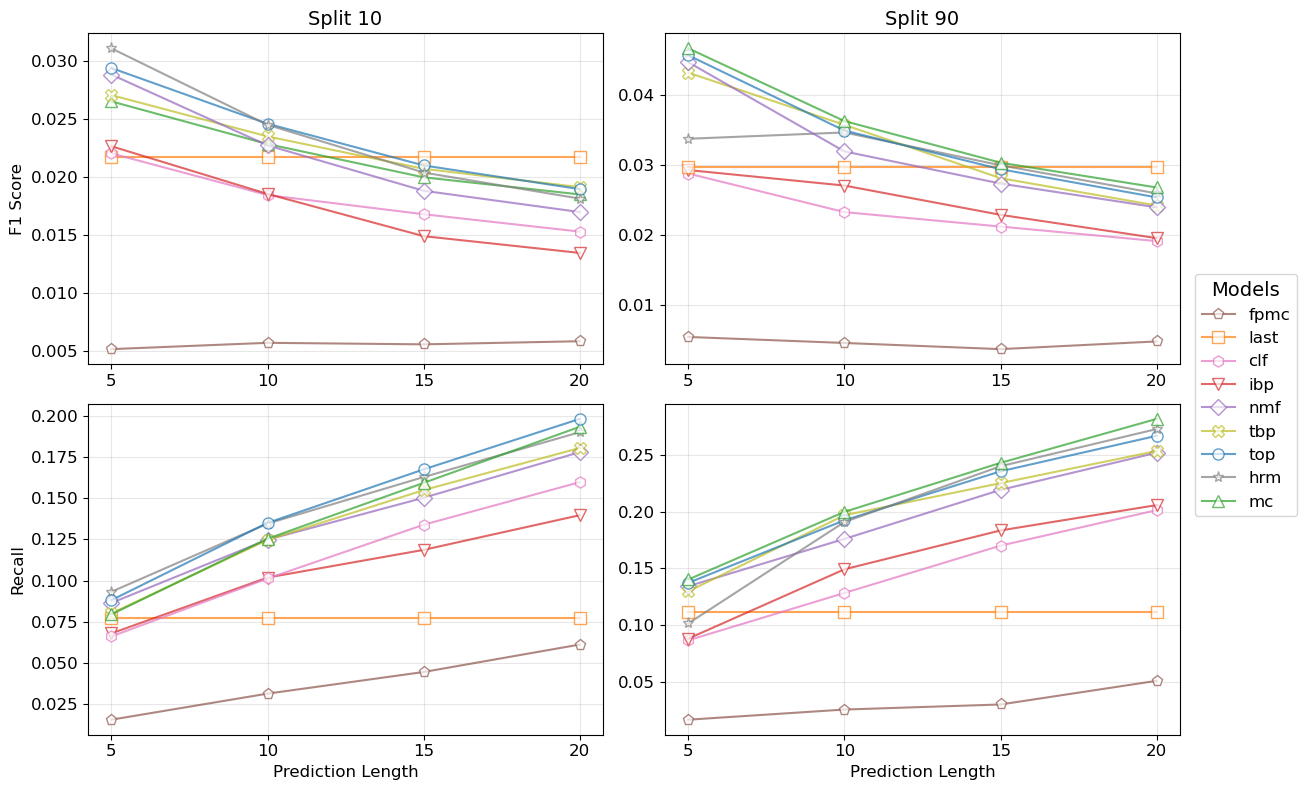

In [38]:
# Filter for specific prediction lengths
fig, axes = plot_model_performance(df2,
                                   metrics,
                                   selected_splits=[10, 90],
                                   selected_pred_lengths=[5, 10, 15, 20])

# Show the plot
plt.show()

### Forgotten, Max Days = 0,  Max Items = 2

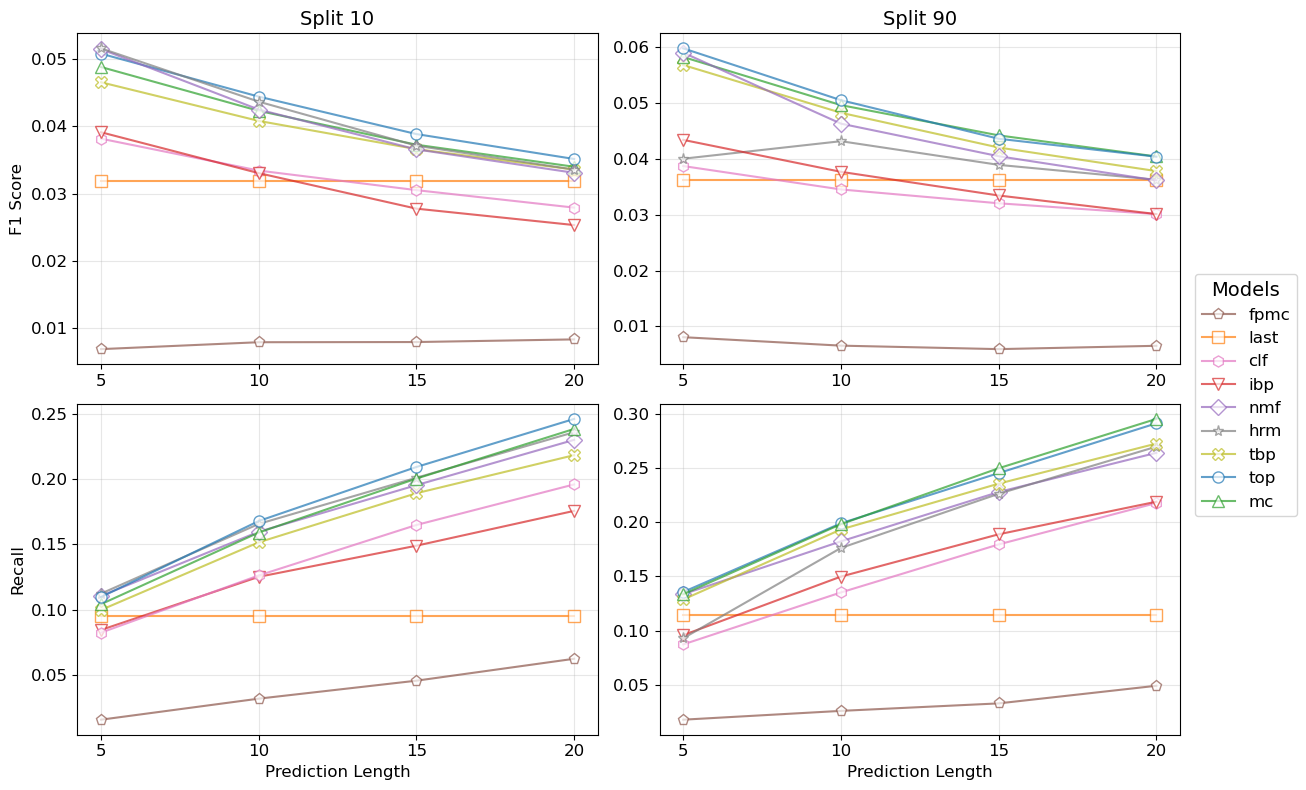

In [39]:
# Filter for specific prediction lengths
fig, axes = plot_model_performance(df3, 
                                   metrics,
                                   selected_splits=[10, 90],
                                   selected_pred_lengths=[5, 10, 15, 20])

# Show the plot
plt.show()

### Forgotten, Max Days = 1,  Max Items = 1

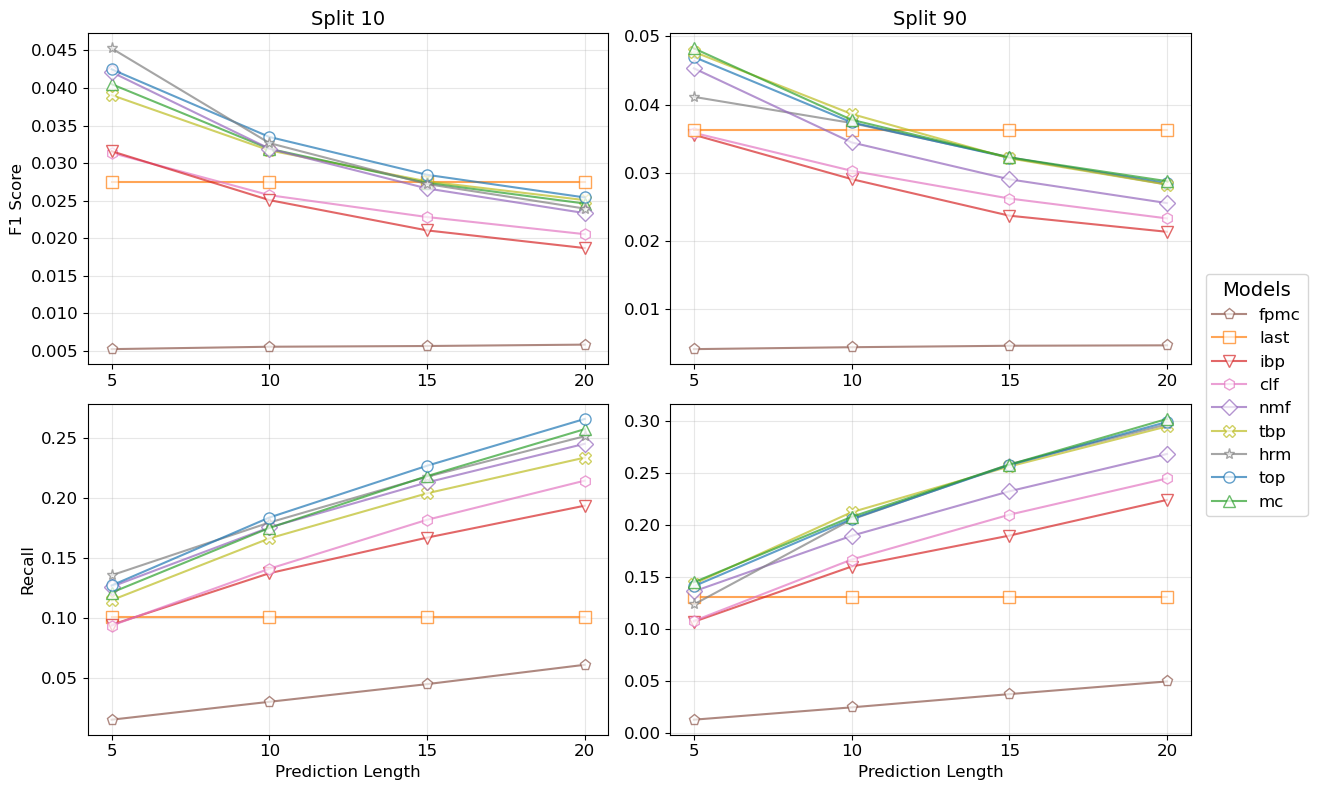

In [40]:
# Filter for specific prediction lengths
fig, axes = plot_model_performance(df4, 
                                   metrics,
                                   selected_splits=[10, 90],
                                   selected_pred_lengths=[5, 10, 15, 20])

# Show the plot
plt.show()

### Forgotten, Max Days = 1,  Max Items = 2

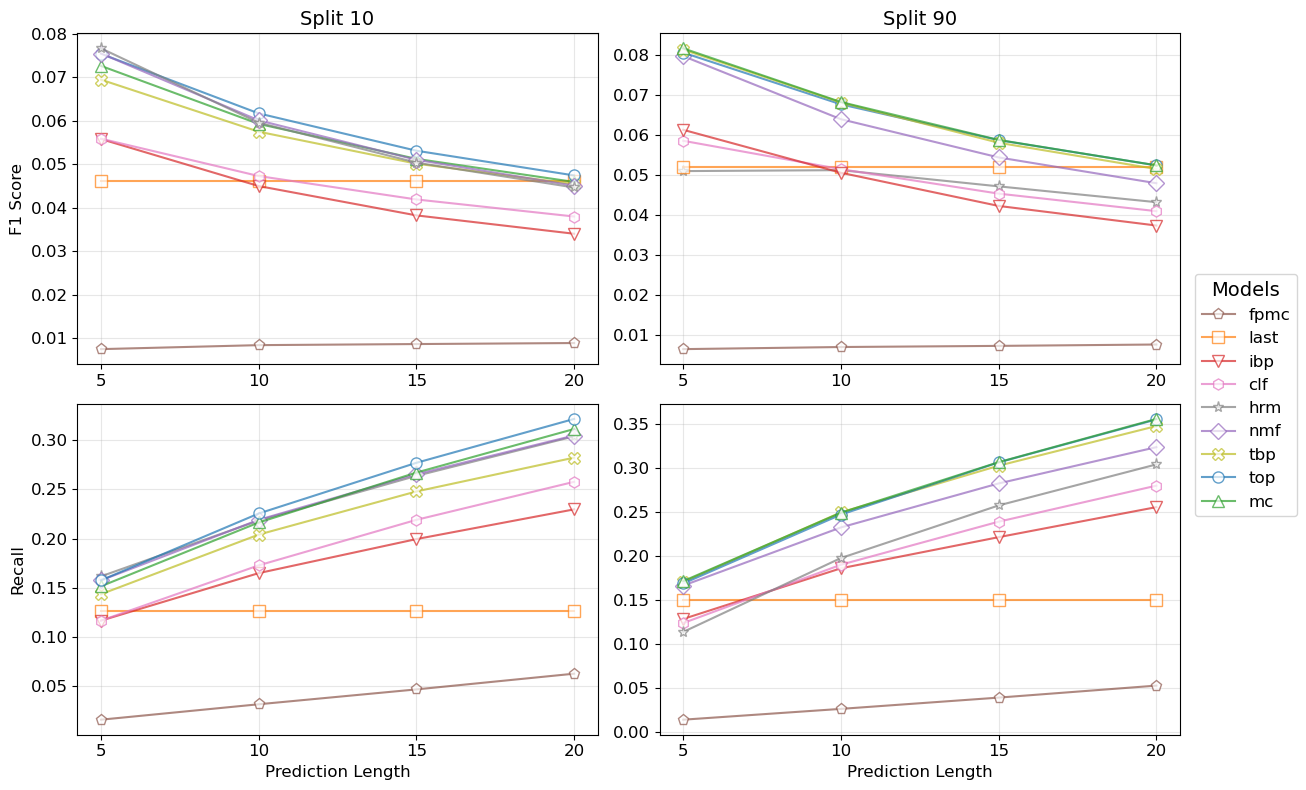

In [41]:
# Filter for specific prediction lengths
fig, axes = plot_model_performance(df5, 
                                   metrics,
                                   selected_splits=[10, 90],
                                   selected_pred_lengths=[5, 10, 15, 20])

# Show the plot
plt.show()

### Forgotten, Max Days = 2,  Max Items = 1

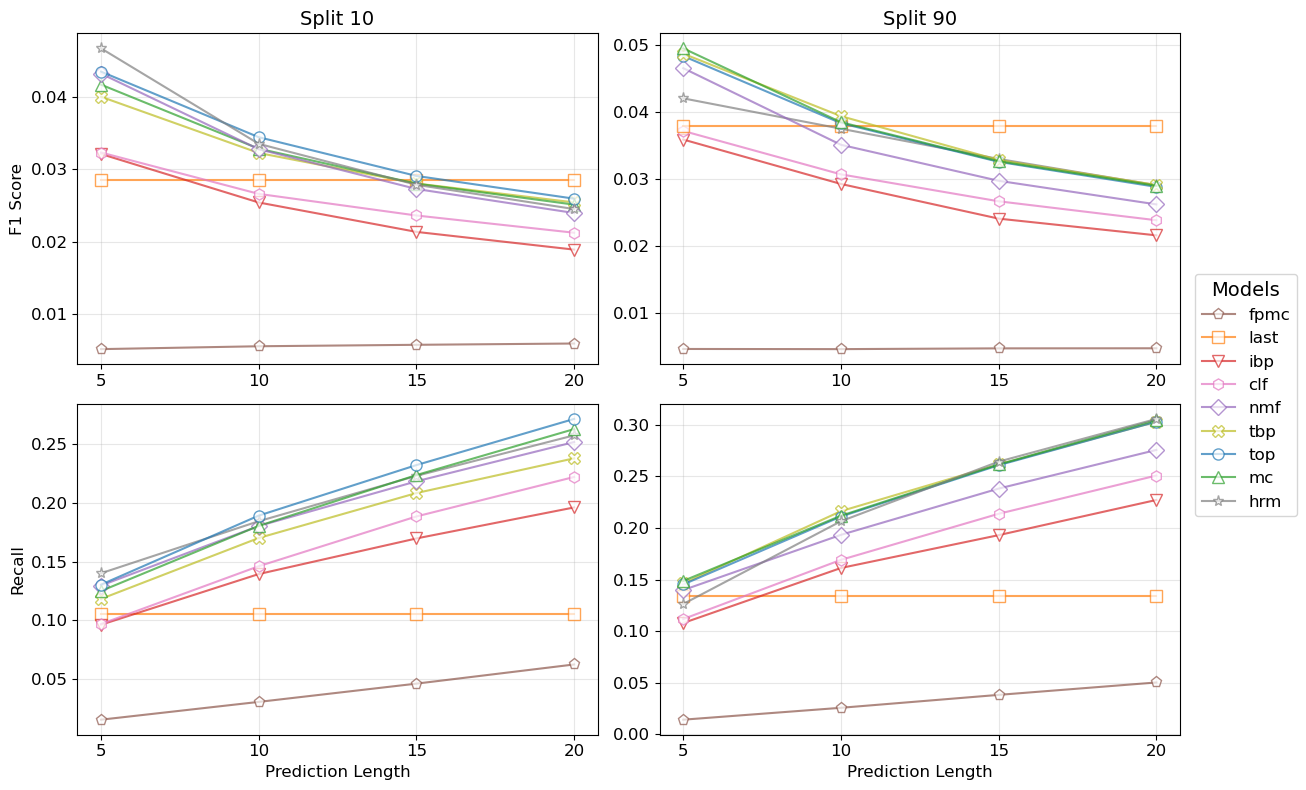

In [42]:
# Filter for specific prediction lengths
fig, axes = plot_model_performance(df6, 
                                   metrics,
                                   selected_splits=[10, 90],
                                   selected_pred_lengths=[5, 10, 15, 20])

# Show the plot
plt.show()

### Forgotten, Max Days = 2,  Max Items = 2

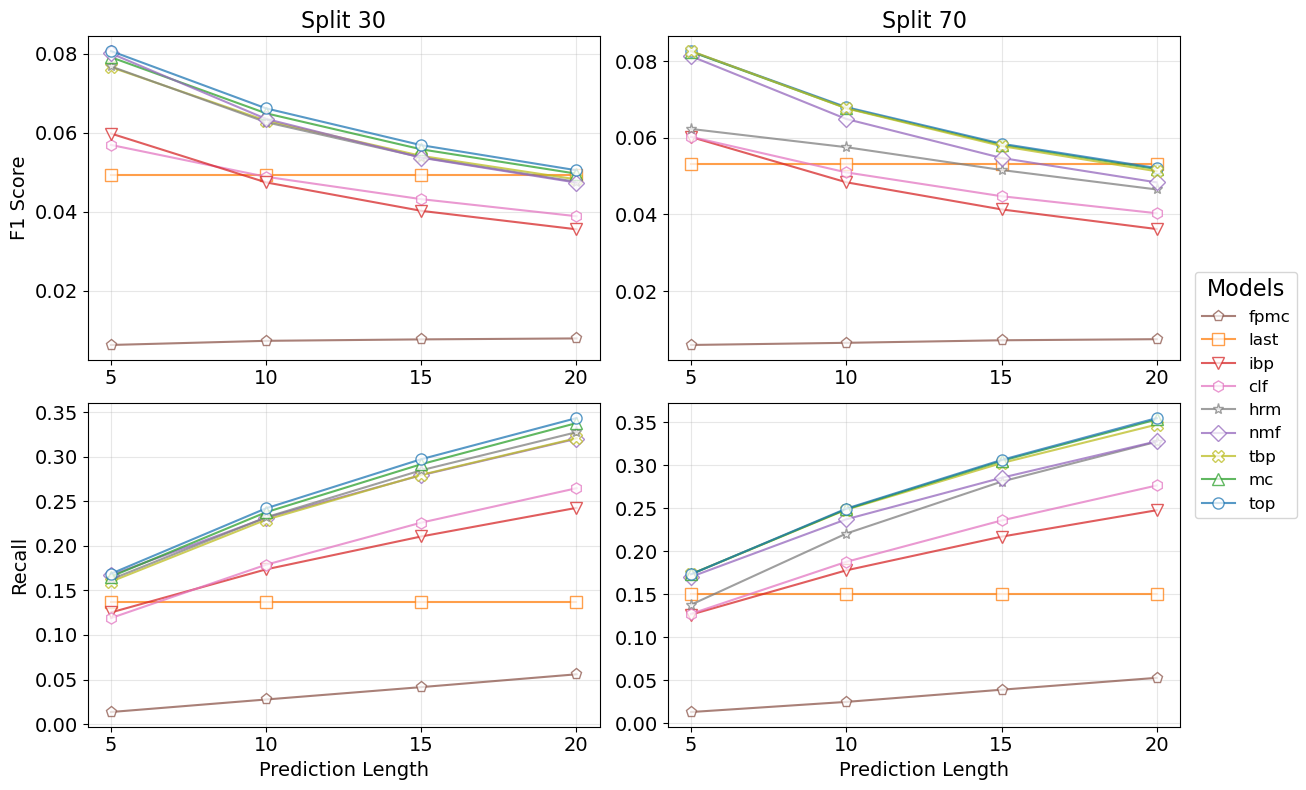

In [ ]:
# Filter for specific prediction lengths
fig, axes = plot_model_performance(df7,
                                   metrics,
                                   selected_splits=[30, 70],
                                   selected_pred_lengths=[5, 10, 15, 20],
                                   label_fontsize=14,
                                   title_fontsize=16,
                                   legend_fontsize=12,
                                   line_alpha=0.75,
                                   save_path='1fE_pred_length_fib.png')

# Show the plot
plt.show()